# Implementation of Perelson et al.

In this implementation we're going to evaluate the properties of a [dynamical model](http://science.sciencemag.org/content/271/5255/1582).

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### (1) Reproduce all four panels from Figure 1 shown in Perelson et al. using eq. 6

Since we are not given any empirical data, use the fitted parameters and the appropriate constants to generate the curves shown on these plots. Remember to account for the time delays for each patient.

#### (i) Implement eq. 6 from the paper as a function.

In [35]:
# Answer
import math
def Vt(Vo, c, delta, t):
    res = Vi(Vo,c,t) + Vni(Vo,c,delta,t)
    return res


def Vi(Vo, c, t):
    Vi = np.zeros(len(t))
    for i in t:
        Vi[i] = Vo*math.exp(-c*t[i])
    return Vi

def Vni(Vo, c, delta, t):
    Vni = np.zeros(len(t))
    for i in t:
        Vni[i] = c*Vo/(c-delta) * (c/(c-delta)*(math.exp(-delta*t[i])-math.exp(-c*t[i]))-delta*t[i]*math.exp(-c*t[i]))
    return Vni
    

#### (ii) Make the plot from this function's values over time.

Note that some constants are given in other papers published by this lab. An estimate of k, the viral infectivity rate, can be found in Wein et al. (J. Theor. Biol. 192:81-98) to be $3.43\times10^{-8}$ mL/(virion•day). Note that you will need to solve ordinary differential equations for $T^*$, $V_I$, and $V_{NI}$ to reproduce the data in Figure 1.

Text(0, 0.5, 'Infectivity')

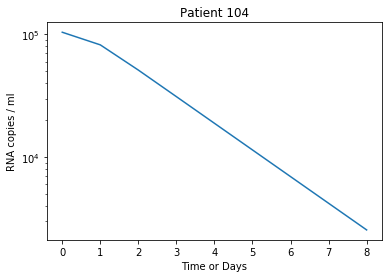

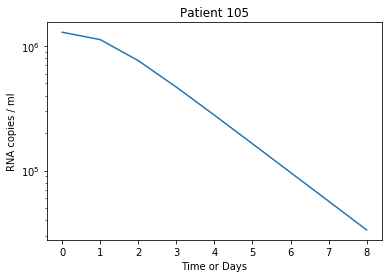

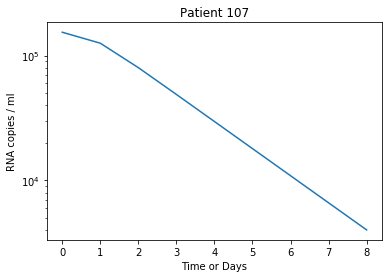

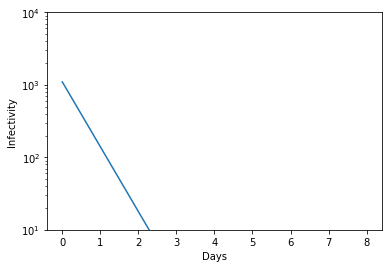

In [3]:
# Answer
import numpy as np
t = np.arange(0,9)

#order: T, V, c, delta
pat104 = [2e3, 52*2e3, 3.68, 0.5]
pat105 = [11e3, 643*2e3, 2.06, 0.53]
pat107 = [412e3, 77*2e3, 3.09, 0.5]

gr104 = Vt(pat104[1], pat104[2], pat104[3], t)
plt.yscale('log')
plt.plot(t, gr104)
plt.xlabel('Time or Days')
plt.ylabel('RNA copies / ml')
plt.title('Patient 104')

plt.figure()
gr105 = Vt(pat105[1], pat105[2], pat105[3], t)
plt.plot(t, gr105)
plt.yscale('log')
plt.xlabel('Time or Days')
plt.ylabel('RNA copies / ml')
plt.title('Patient 105')

plt.figure()
gr107 = Vt(pat107[1], pat107[2], pat107[3], t)
plt.plot(t, gr107)
plt.yscale('log')
plt.xlabel('Time or Days')
plt.ylabel('RNA copies / ml')
plt.title('Patient 107')

gr105d = Vi(pat105[1], pat105[2], t) * 1.1e3/pat105[1]
plt.figure()
plt.yscale('log')
plt.plot(t, gr105d)
plt.xlabel('Days')
plt.ylim(10,1e4)
plt.ylabel('Infectivity')

### (2) Can the model of virion production before treatment show stable or unstable oscillations?

Justify your answer.

In [4]:
from numpy import linalg as LA
k = 3.43e-8
#order: T, V, c, delta

N = pat105[2]* pat105[1] / (pat105[3]*pat105[0])
jacobian = np.array(([-pat105[3], k*pat105[0]],[N*pat105[3], -pat105[2]]))
w,v = LA.eig(jacobian)
print("The eigenvalues for patient 105 is",w)

N = pat104[2]* pat104[1] / (pat104[3]*pat104[0])
jacobian = np.array(([-pat104[3], k*pat104[0]],[N*pat104[3], -pat104[2]]))
w,v = LA.eig(jacobian)
print("The eigenvalues for patient 104 is",w)

N = pat107[2]* pat107[1] / (pat107[3]*pat107[0])
jacobian = np.array(([-pat107[3], k*pat107[0]],[N*pat107[3], -pat107[2]]))
w,v = LA.eig(jacobian)
print("The eigenvalues for patient 107 is",w)

The eigenvalues for patient 105 is [-0.47275236 -2.11724764]
The eigenvalues for patient 104 is [-0.49587726 -3.68412274]
The eigenvalues for patient 107 is [-0.49371333 -3.09628667]


It's neither because you always get a real value for eigenvalues (not complex/imaginary). Therefore it's not oscillating. The solution is, however, stable because both eigenvalues are negative.

### (3) Reimplement the model relaxing the assumption about T remaining constant by numerically solving the system of ODEs.

#### i. Define a function that takes each parameter as a vector and outputs the time derivative of each species.

In [5]:
# Answer
#order: T(0), V(1), c(2), delta(3)

N = (pat105[2]*pat105[1])/(pat105[3]*pat105[0])
Tstar = pat105[2]*pat105[1] / (pat105[3]*N)
init = [Tstar, pat105[1], 0] #initial Tstar, VI from table, VNI=0

def model(init, t, N, Tstar, c, delta, Tpat, Vpat): 
    
    dTstardt = 3.43e-8*Vpat*(Tpat) - delta*init[0]
    dVidt = -c*init[1]
    dVnidt = N*delta*init[0] - c*init[2]
    
    return dTstardt, dVidt, dVnidt

#### ii. Use odeint to solve this system of equations numerically for patient 105.

Hint: For ease later, it may be helpful to make a function here that handles everything but takes in gnu.

In [6]:
# Answer
model105 = odeint(model, init, t, args=(N, Tstar, pat105[2], pat105[3], pat105[0], pat105[1]))

#### iii. Reproduce the subpanels of Fig. 1 with this updated model. 

[1286000.          989311.97143385  650349.04397456  429889.15739823
  297455.89721473  219164.78689348  173038.88594668  145883.4244625
  129898.88044653]


Text(0, 0.5, 'Infectivity')

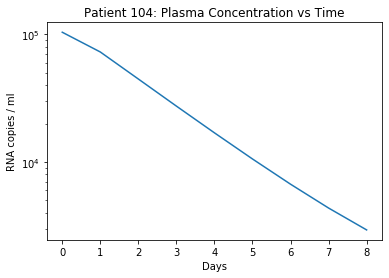

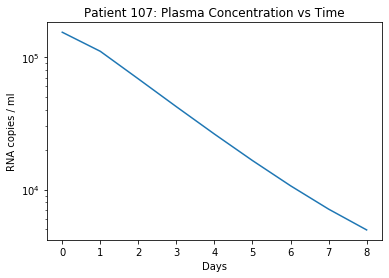

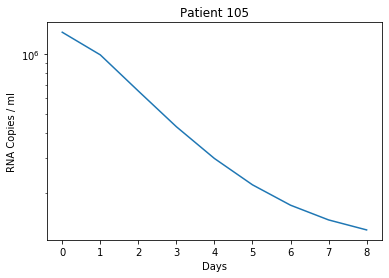

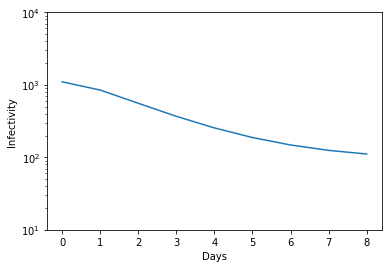

In [7]:
# Answer
plt.figure()
plt.title('Patient 104: Plasma Concentration vs Time')
plt.yscale('log')
plt.xlabel('Days')
plt.ylabel('RNA copies / ml')
N4 = (pat104[2]*pat104[1])/(pat104[3]*pat104[0])
Tstar4 = pat104[2]*pat104[1] / (pat104[3]*N4)
init4 = [Tstar4, pat104[1], 0] #initial Tstar, VI from table, VNI=0
model104 = odeint(model, init4, t, args=(N4, Tstar4, pat104[2], pat104[3], pat104[0], pat104[1]))
Vt104 = model104[:,1] + model104[:,2]
plt.plot(t, Vt104)

plt.figure()
plt.title('Patient 107: Plasma Concentration vs Time')
plt.yscale('log')
plt.xlabel('Days')
plt.ylabel('RNA copies / ml')
N7 = (pat107[2]*pat107[1])/(pat107[3]*pat107[0])
Tstar7 = pat107[2]*pat107[1] / (pat107[3]*N7)
init7 = [Tstar7, pat107[1], 0] #initial Tstar, VI from table, VNI=0
model107 = odeint(model, init7, t, args=(N7, Tstar7, pat107[2], pat107[3], pat107[0], pat107[1]))
Vt107 = model107[:,1] + model107[:,2]
plt.plot(t, Vt107)

plt.figure()
plt.title("Patient 105")
# plt.plot(t, model105[:,1])
# plt.plot(t, model105[:,2])
Vt = model105[:,1] + model105[:,2]
plt.plot(t, Vt)
print(Vt)
plt.yscale('log')
plt.xlabel('Days')
plt.ylabel("RNA Copies / ml")

plt.figure()
infVt = Vt * 1.1e3 / pat105[1]
plt.plot(t,infVt)
plt.yscale('log')
plt.xlabel('Days')
plt.ylim(10,1e4)
plt.ylabel('Infectivity')

#### iv. Are the results the same as in (1)?

Show evidence of your conclusion.

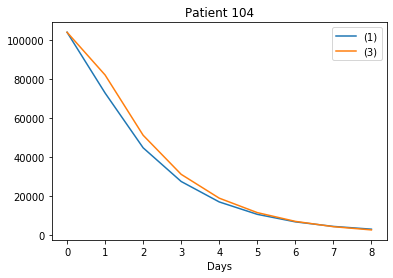

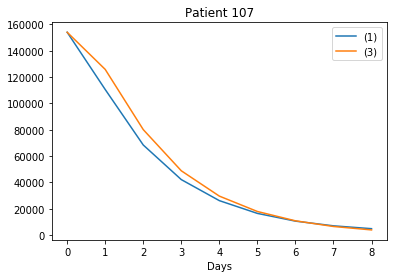

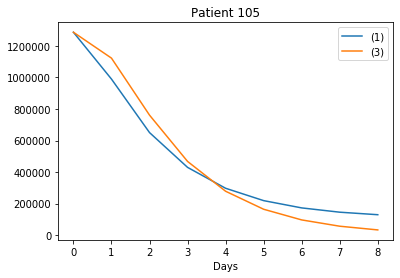

In [8]:
# Answer
plt.title("Patient 104")
plt.plot(t, Vt104, label="(1)")
plt.plot(t, gr104, label = "(3)")
plt.xlabel("Days")
plt.legend()

plt.figure()
plt.title("Patient 107")
plt.plot(t, Vt107,label="(1)")
plt.plot(t, gr107,label="(3)")
plt.xlabel("Days")
plt.legend()

plt.figure()
plt.title("Patient 105")
plt.plot(t, Vt,label="(1)")
plt.plot(t, gr105,label="(3)")
plt.xlabel("Days")
plt.legend()

### (4) Repeat the work that the authors describe in item 12 of their “References and Notes”.

#### (i) Namely, vary the effectiveness factor of the drug (η=1.0, 0.99, 0.95, and 0.90) and simulate the viral load that would result from the modified differential equations using the parameters c=3.0 days$^{-1}$ and δ=0.5 days$^{-1}$ as described in item 12 and the values of T0, V0, and the time delay provided for patient 105.

Text(0.5, 1.0, 'Patient 105 eta=0.9')

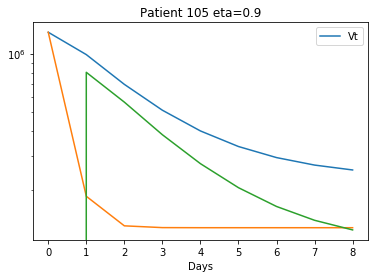

In [43]:
# Answer
#order: T(0), V(1), c(2), delta(3)

eta = [1.0, 0.99, 0.95, 0.90]
c = 3
delta = 0.5
# tps = np.linspace(.25,8,100)
tps = np.arange(0,9)
T = pat105[0]
Vo = pat105[1]
N = (c*pat105[1])/(delta*pat105[0])
Tstar = c*pat105[1] / (delta*N)
init = [Tstar,pat105[1],0]

def modelEta(init, tps, N, Tstar, c, delta, Tpat, Vpat, eta): 
    
    dTstardt = 3.43e-8*Vpat*(Tpat) - delta*init[0]
    dVidt = -c*init[1]+(1-eta)*N*delta*Tpat
    dVnidt = eta*N*delta*init[0] - c*init[2]
    
    return dTstardt, dVidt, dVnidt

model5Eta0 = odeint(modelEta, init, tps, args=(N, Tstar, c, delta, pat105[0], pat105[1], eta[0]))
model5Eta1 = odeint(modelEta, init, tps, args=(N, Tstar, c, delta, pat105[0], pat105[1], eta[1]))
model5Eta2 = odeint(modelEta, init, tps, args=(N, Tstar, c, delta, pat105[0], pat105[1], eta[2]))
model5Eta3 = odeint(modelEta, init, tps, args=(N, Tstar, c, delta, pat105[0], pat105[1], eta[3]))

Vt3 = model5Eta3[:,1] + model5Eta3[:,2]
plt.plot(tps, Vt3, label = "Vt")
plt.plot(tps, model5Eta3[:,1])
plt.plot(tps, model5Eta3[:,2])
plt.yscale('log')
plt.xlabel("Days")
plt.legend()
plt.title("Patient 105 eta=0.9")

#### (ii) Then, use the function `scipy.optimize.leastsq` to fit this data to the equation for V(t) given in the paper and find the estimates of c and δ that result. Fit only the portion of the curve after the pharmacokinetic delay. Compare these estimates to the actual values for c and δ and discuss the consequences of an imperfect drug on clearance time estimates.

In [63]:
# Answer
from scipy.optimize import least_squares
tps = np.arange(0,9)

def residual(tai, Vnew, Vzero, tps):
    a = Vi(Vzero, tai[0], tps) + Vni(Vzero, tai[0], tai[1], tps)
    error = Vnew - Vt(Vzero, tai[0], tai[1], tps)
    return error

Vt0 = model5Eta0[:,1] + model5Eta0[:,2]
Vt1 = model5Eta1[:,1] + model5Eta1[:,2]
Vt2 = model5Eta2[:,1] + model5Eta2[:,2]
Vt3 = model5Eta3[:,1] + model5Eta3[:,2]

resi0 = residual([c,delta], Vt0, 643*2e3, t)
resi1 = residual([c,delta], Vt1, 643*2e3, t)
resi2 = residual([c,delta], Vt2, 643*2e3, t)
resi3 = residual([c,delta], Vt3, 643*2e3, t)

optimized = least_squares(residual, [c,delta], args =(Vt0, 6432e3,t))
fitparam0 = optimized.x
print("c and delta values for eta = 1.0 are", fitparam0)

optimized = least_squares(residual, [c,delta], args =(Vt1, 6432e3,t))
fitparam1 = optimized.x
print("c and delta values for eta = 0.99 are",fitparam1)

optimized = least_squares(residual, [c,delta], args =(Vt2, 6432e3,t))
fitparam2 = optimized.x
print("c and delta values for eta = 0.95 are",fitparam2)

optimized = least_squares(residual, [c,delta], args =(Vt3, 6432e3,t))
fitparam3 = optimized.x
print("c and delta values for eta = 0.90 are",fitparam3)


c and delta values for eta = 1.0 are [1.59465696e+06 1.71887921e+00]
c and delta values for eta = 0.99 are [1.69431694e+06 1.71247164e+00]
c and delta values for eta = 0.95 are [1.64448695e+06 1.68678986e+00]
c and delta values for eta = 0.90 are [1.59494894e+06 1.65454761e+00]


I think the resulting least_square value for c does not make sense. Although I don't know if the delta is correct, I feel like that value is still sensible.

#### (iii) Examine the residual plots from your fits to determine whether or not there is a trend in the error associated with fitting these new curves.

Text(0.5, 1.0, 'Patient 105, eta = 0.90')

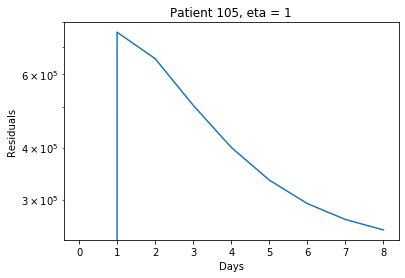

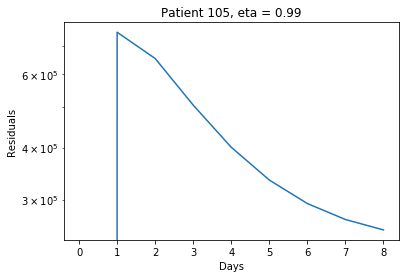

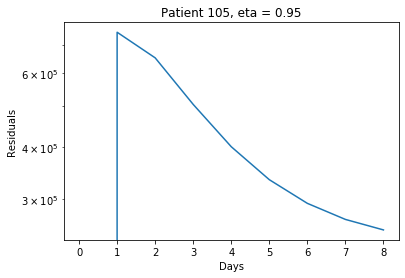

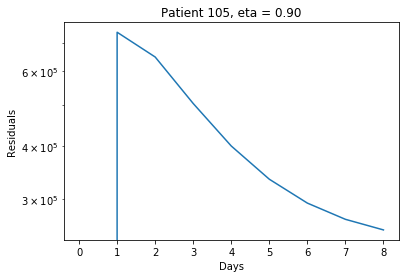

In [65]:
# Answer

resifix3 = residual(fitparam3, Vt3, 643*2e3, t)
resifix2 = residual(fitparam2, Vt3, 643*2e3, t)
resifix1 = residual(fitparam1, Vt3, 643*2e3, t)
resifix0 = residual(fitparam0, Vt3, 643*2e3, t)

plt.figure()
plt.plot(t, resifix0)
plt.yscale('log')
plt.xlabel("Days")
plt.ylabel("Residuals")
plt.title("Patient 105, eta = 1")

plt.figure()
plt.plot(t, resifix1)
plt.yscale('log')
plt.xlabel("Days")
plt.ylabel("Residuals")
plt.title("Patient 105, eta = 0.99")

plt.figure()
plt.plot(t, resifix2)
plt.yscale('log')
plt.xlabel("Days")
plt.ylabel("Residuals")
plt.title("Patient 105, eta = 0.95")

plt.figure()
plt.plot(t, resifix3)
plt.xlabel("Days")
plt.ylabel("Residuals")
plt.yscale('log')
plt.title("Patient 105, eta = 0.90")

My least_square code by itself is not working properly so the residual plots here looks wonky. 

### (5) To determine the TCID50 one should estimate an infectivity coefficient.

To calculate the infectivity coefficient, estimate the ratio of $V_I(t=0)$ to the value of TCID50(t=0) for patient 105 from Perelson’s Figure 1. This coefficient acts as a conversion factor between the number of virions in the infectious pool, $V_I$, and the TCID50, and is an indicator of the efficiency of the HIV-1 transmission.

Text(0.5, 1.0, 'Patient 105')

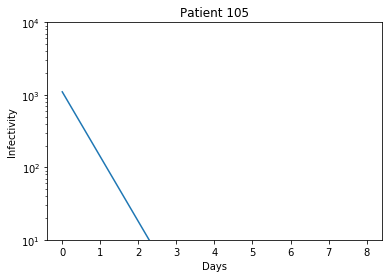

In [152]:
# Answer
t = np.arange(0,9)
V0 = pat105[1]

VI = Vi(V0, pat105[2],t)
v = (1.1e3 / V0) * VI

plt.plot(t, v)
plt.yscale('log')
plt.ylim((10,1e4))
plt.xlabel('Days')
plt.ylabel('Infectivity')
plt.title("Patient 105")